In [1]:
#Insurance Data set case study for LinearGression

In [108]:
##EDA

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv(r"C:\Users\user\Desktop\insurance (1).csv")

df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
cat_cols = ['sex', 'smoker', 'region']

for col in cat_cols:
    df[col] = df[col].str.lower().str.strip()

In [7]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

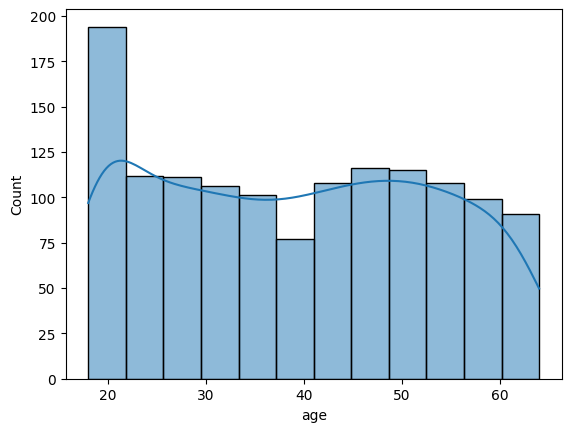

In [8]:
sns.histplot(df['age'], kde=True)
plt.show()

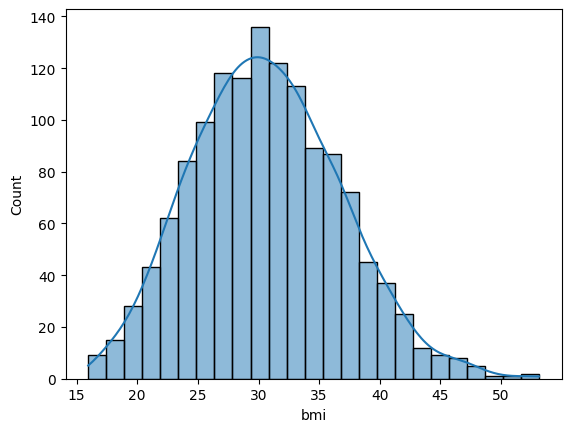

In [9]:
sns.histplot(df['bmi'], kde=True)
plt.show()

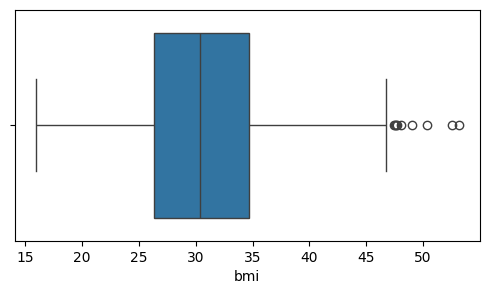

In [10]:
plt.figure(figsize=(6,3))

sns.boxplot(x=df['bmi'])

plt.show()

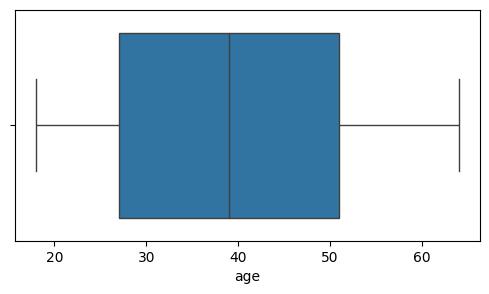

In [11]:
plt.figure(figsize=(6,3))

sns.boxplot(x=df['age'])

plt.show()

In [12]:
#x=df.corr()
#sns.heatmap(x, annot=True)
#plt.show()
#This doesnt work as of now because our data set still has categorical values.

In [13]:
from sklearn.model_selection import train_test_split

In [19]:
# Identifying features and target from the dataset and splitting them for training and testing 

In [14]:
x = df[['age','bmi', 'smoker', 'children', 'sex', 'region']]      # feature
y = df[['charges']]                                 #target

In [15]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [16]:
print("Total data:",len(df))
print("Train data:",len(x_train))
print("Test Data:",len(x_test))

Total data: 1338
Train data: 1070
Test Data: 268


In [17]:
catcol= ['sex','smoker', 'region']     #we make an array of categorical data for transforming->feature scaling
numcol= ['age', 'bmi', 'children']     # an array of numerical data for  performing scaling

In [18]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler

In [20]:
processor = ColumnTransformer(transformers=[('cat', OneHotEncoder(), catcol),  
                                            ('num', MinMaxScaler(),numcol)])  #(step_name, class, col_list)

In [21]:
x_train= processor.fit_transform(x_train)
x_test= processor.transform(x_test)

In [23]:
##  checking data description after performing encoding.

In [25]:
num_features = numcol
cat_features = processor.named_transformers_['cat'].get_feature_names_out(catcol)

In [26]:
all_features = list(num_features) + list(cat_features)

In [28]:
X_train_df = pd.DataFrame(x_train, columns=all_features)

In [29]:
X_train_df.describe()
X_train_df.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.608696,0.107345,0.4
1,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.630435,0.224913,0.0
2,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.739130,0.239440,0.0
3,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.456522,0.493947,1.0
4,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.782609,0.148238,0.6


In [30]:
#Categorical data is now converted into numerical, which is important for ant ML model

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import math

In [32]:
#Training a multi linear regression model

In [33]:
model1 = LinearRegression()  # create object

model1.fit(x_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [117]:
y_pred = model1.predict(x_test)

In [35]:
r2 = r2_score(y_test,y_pred)
print(r2)
rmascore = mean_absolute_error(y_test,y_pred)
print(rmascore)
rmscore = mean_squared_error(y_test,y_pred)
print(rmscore)

0.7835929767120724
4181.194473753643
33596915.85136145


In [124]:
# Predicting values for training data
y_train_pred = model1.predict(x_train)

In [ ]:
#ploting for training data

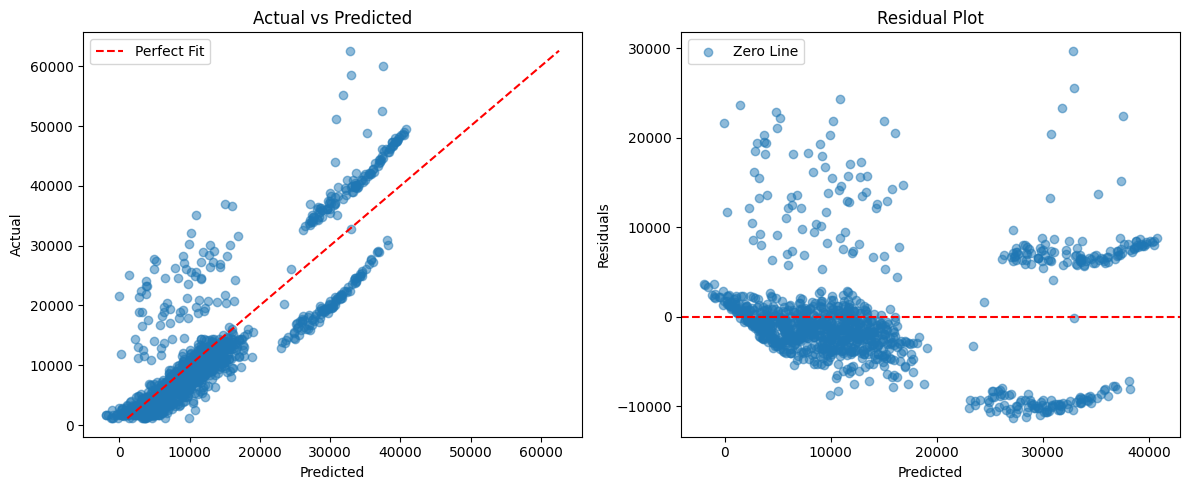

In [161]:
residuals = y_train - y_train_pred

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_train_pred, y_train, alpha=0.5)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', label='Perfect Fit')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Actual vs Predicted')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(y_train_pred, residuals, alpha=0.5, label='Zero Line')
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.legend()

plt.tight_layout()
plt.show()

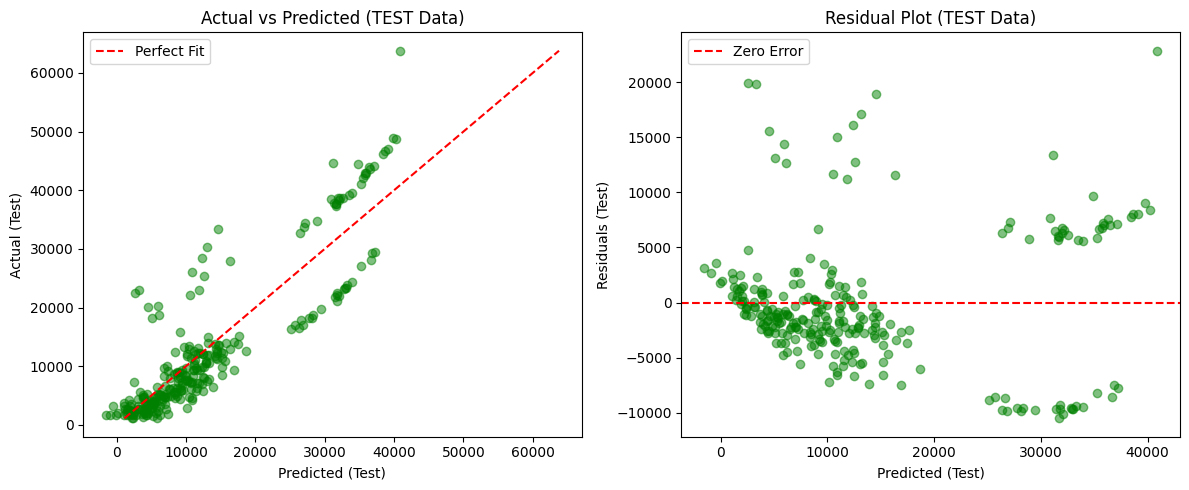

In [163]:
# y_test_pred = model1.predict(x_test)
# Plotting for test data
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_pred, y_test, alpha=0.5, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Perfect Fit')
plt.xlabel('Predicted (Test)')
plt.ylabel('Actual (Test)')
plt.title('Actual vs Predicted (TEST Data)')
plt.legend()

plt.subplot(1, 2, 2)
residuals_test = y_test - y_pred
plt.scatter(y_test_pred, residuals_test, alpha=0.5, color='green')
plt.axhline(y=0, color='r', linestyle='--', label= 'Zero Error')
plt.xlabel('Predicted (Test)')
plt.ylabel('Residuals (Test)')
plt.title('Residual Plot (TEST Data)')
plt.legend()

plt.tight_layout()
plt.show()

In [109]:
# Traning a Polynomial linear Regression

In [37]:
from sklearn.preprocessing import PolynomialFeatures

In [103]:
poly= PolynomialFeatures(degree=2)

In [104]:
x_train_2= poly.fit_transform(x_train)
x_test_2= poly.transform(x_test)

In [105]:
model2 = LinearRegression()
model2.fit(x_train_2,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [106]:
y_pred_2 = model2.predict(x_test_2)

In [162]:
y_pred_2

array([[11215.72133573],
       [ 6055.22653741],
       [33306.27444924],
       [10833.80112228],
       [29082.43036144],
       [ 4258.24448939],
       [ 2803.16158684],
       [16037.07690313],
       [ 4106.52868351],
       [12147.42558983],
       [20028.8757701 ],
       [ 9337.04044735],
       [ 5818.84568409],
       [49497.37304858],
       [53113.5937285 ],
       [45430.5761478 ],
       [10241.19985184],
       [41674.61188463],
       [10080.8431564 ],
       [25746.27231737],
       [ 3457.33375943],
       [ 8194.71496457],
       [ 1959.28733509],
       [ 5462.27995185],
       [12888.82915338],
       [12399.24089824],
       [14240.76160301],
       [ 8094.46623134],
       [11950.74969399],
       [ 3186.67935961],
       [ 8780.78145851],
       [12491.65988454],
       [ 3133.60249208],
       [ 7079.81057509],
       [ 3649.85032867],
       [ 8703.71386282],
       [ 3897.23030936],
       [ 8673.9286432 ],
       [24874.96813275],
       [36937.9714649 ],


In [107]:
r2 = r2_score(y_test,y_pred_2)
print(r2)
rmascore = mean_absolute_error(y_test,y_pred_2)
print(rmascore)
rmscore = mean_squared_error(y_test,y_pred_2)
print(rmscore)

0.866583090316484
2729.5001336394466
20712805.987918377
